In [1]:
import tensorflow
import keras
import imutils
import numpy
import cv2
import matplotlib
import scipy

print("TensorFlow version:", tensorflow.__version__)
print("Keras version:", keras.__version__)
print("Imutils version:", imutils.__version__)
print("NumPy version:", numpy.__version__)
print("OpenCV version:", cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SciPy version:", scipy.__version__)


TensorFlow version: 2.16.1
Keras version: 3.2.1
Imutils version: 0.5.3
NumPy version: 1.25.2
OpenCV version: 4.9.0
Matplotlib version: 3.7.2
SciPy version: 1.11.2


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os

In [6]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [7]:
DIRECTORY = r"C:\Users\Suraj\OneDrive\Desktop\Dataset"
CATEGORIES = ["formals", "informal"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

[INFO] loading images...


In [8]:
data = []
labels = []

In [9]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

In [10]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [11]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [12]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

C:\Users\Suraj\AppData\Local\Temp\ipykernel_22248\2912745669.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


In [13]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [14]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [15]:
for layer in baseModel.layers:
	layer.trainable = False

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
print("[INFO] compiling model...")
opt = Adam(learning_rate=0.0001, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


C:\Users\Suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [18]:
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20


C:\Users\Suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5579 - loss: 0.8178 - val_accuracy: 0.7083 - val_loss: 0.6210
Epoch 2/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.4688 - loss: 0.7669

C:\Users\Suraj\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.4688 - loss: 0.7669 - val_accuracy: 0.7083 - val_loss: 0.5993
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 640ms/step - accuracy: 0.6847 - loss: 0.6425 - val_accuracy: 0.7500 - val_loss: 0.5627
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.6562 - loss: 0.6452 - val_accuracy: 0.7500 - val_loss: 0.5466
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 678ms/step - accuracy: 0.7381 - loss: 0.5864 - val_accuracy: 0.7917 - val_loss: 0.5191
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.7500 - loss: 0.5471 - val_accuracy: 0.7917 - val_loss: 0.5058
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.7181 - loss: 0.6234 - val_accuracy: 0.7917 - val_loss: 0.4805
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.6250 - loss: 0.6247 - val_accuracy: 0.7917 - val_loss: 0.4680
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 690ms/step - accuracy: 0.6771 - loss: 0.5641 - val_accuracy: 0.7917 - val_loss: 0.4431
Epo

In [19]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [20]:
predIdxs = np.argmax(predIdxs, axis=1)

In [21]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

     formals       0.94      1.00      0.97        16
    informal       1.00      0.88      0.93         8

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24



In [22]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.h5")

[INFO] saving mask detector model...


In [23]:
model.save("mask_detector.keras")
print("saved")

saved


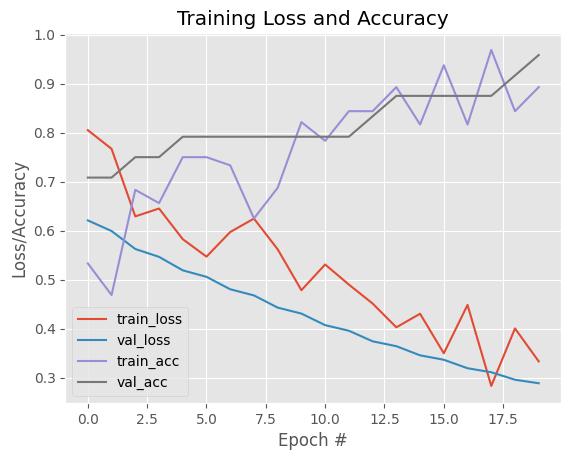

In [24]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")